In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
# pd.options.display.float_format = '{:.2f}'.format

In [13]:
data = pd.read_csv('ball_by_ball_ipl.csv')
pd.set_option('display.max_columns', 500)
data.head()

,Unnamed: 0,Match ID,Date,Venue,Bat First,Bat Second,Innings,Over,Ball,Batter,Non Striker,Bowler,Batter Runs,Extra Runs,Runs From Ball,Ball Rebowled,Extra Type,Wicket,Method,Player Out,Innings Runs,Innings Wickets,Target Score,Runs to Get,Balls Remaining,Winner,Chased Successfully,Total Batter Runs,Total Non Striker Runs,Batter Balls Faced,Non Striker Balls Faced,Player Out Runs,Player Out Balls Faced,Bowler Runs Conceded,Valid Ball
0,0,1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,1,RD Gaikwad,DP Conway,UT Yadav,4,0,4,0,[],0,NaN,NaN,4,0,236,NaN,119,Chennai Super Kings,0,4,0,1,0,NaN,NaN,4,1
1,1,1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,2,RD Gaikwad,DP Conway,UT Yadav,0,0,0,0,[],0,NaN,NaN,4,0,236,NaN,118,Chennai Super Kings,0,4,0,2,0,NaN,NaN,0,1
2,2,1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,3,RD Gaikwad,DP Conway,UT Yadav,0,0,0,0,[],0,NaN,NaN,4,0,236,NaN,117,Chennai Super Kings,0,4,0,3,0,NaN,NaN,0,1
3,3,1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,4,RD Gaikwad,DP Conway,UT Yadav,0,0,0,0,[],0,NaN,NaN,4,0,236,NaN,116,Chennai Super Kings,0,4,0,4,0,NaN,NaN,0,1
4,4,1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,5,RD Gaikwad,DP Conway,UT Yadav,1,0,1,0,[],0,NaN,NaN,5,0,236,NaN,115,Chennai Super Kings,0,5,0,5,0,NaN,NaN,1,1


In [47]:
data.shape

(239693, 35)

In [6]:
data.columns

Index(['Unnamed: 0', 'Match ID', 'Date', 'Venue', 'Bat First', 'Bat Second',
       'Innings', 'Over', 'Ball', 'Batter', 'Non Striker', 'Bowler',
       'Batter Runs', 'Extra Runs', 'Runs From Ball', 'Ball Rebowled',
       'Extra Type', 'Wicket', 'Method', 'Player Out', 'Innings Runs',
       'Innings Wickets', 'Target Score', 'Runs to Get', 'Balls Remaining',
       'Winner', 'Chased Successfully', 'Total Batter Runs',
       'Total Non Striker Runs', 'Batter Balls Faced',
       'Non Striker Balls Faced', 'Player Out Runs', 'Player Out Balls Faced',
       'Bowler Runs Conceded', 'Valid Ball'],
      dtype='object')

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239693 entries, 0 to 239692
Data columns (total 35 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               239693 non-null  int64  
 1   Match ID                 239693 non-null  int64  
 2   Date                     239693 non-null  object 
 3   Venue                    239693 non-null  object 
 4   Bat First                239693 non-null  object 
 5   Bat Second               239693 non-null  object 
 6   Innings                  239693 non-null  int64  
 7   Over                     239693 non-null  int64  
 8   Ball                     239693 non-null  int64  
 9   Batter                   239693 non-null  object 
 10  Non Striker              239693 non-null  object 
 11  Bowler                   239693 non-null  object 
 12  Batter Runs              239693 non-null  int64  
 13  Extra Runs               239693 non-null  int64  
 14  Runs

In [44]:
# Considering 2nd innings data
df = data.loc[data['Innings'] == 2]
df = df.drop(columns = ['Unnamed: 0'])

In [48]:
df.shape

(115766, 34)

<Axes: ylabel='count'>

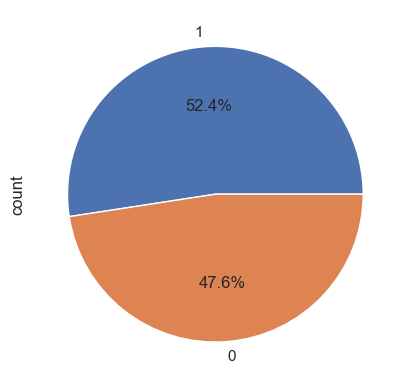

In [49]:
df['Chased Successfully'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [55]:
x = df.drop(columns=['Chased Successfully'], axis=1)
y = df['Chased Successfully']

In [111]:
# Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

x1 = x.select_dtypes(include=[np.number])
x1_c = x1.loc[:, ~x1.isna().any() & ~np.isinf(x1).any()]
inf_features = ['Over', 'Ball', 'Innings', 'Match ID', 'Bowler Runs Conceded', 'Batter Runs', 'Extra Runs', 'Ball Rebowled', 'Wicket', 'Runs to Get', 'Valid Ball']
x1_c = x1_c.drop(columns = inf_features)
vif_data = pd.DataFrame()
vif_data['feature'] = x1_c.columns
vif_data['VIF'] = [variance_inflation_factor(x1_c.values, i) for i in range(len(x1_c.columns))]
vif_data

,feature,VIF
0,Runs From Ball,1.83
1,Innings Runs,19.11
2,Innings Wickets,6.36
3,Target Score,40.80
4,Balls Remaining,15.64
5,Total Batter Runs,15.40
6,Total Non Striker Runs,14.87
7,Batter Balls Faced,15.55
8,Non Striker Balls Faced,15.60


In [96]:
inf_features = ['Over', 'Ball', 'Batter Runs', 'Extra Runs', 'Runs From Ball', 'Ball rebowled', 'Runs to Get', 'Valid Ball']

Series([], Name: feature, dtype: object)